# Import packages

In [6]:
import importlib
import os
import numpy              as np
import pandas             as pd
import scipy              as sp
import matplotlib         as mpl
import matplotlib.pyplot  as plt
from   matplotlib.patches import Rectangle
from   matplotlib         import gridspec, rc
from   matplotlib.colors  import LinearSegmentedColormap
import mplhep             as hep
import my_cmaps           #kViridis, parula, jets
import my_files           as mf
import my_vectors         as mv
filepath = '../sig_npz_files/'
#filepath = '../bkg_npz_files/'
mf.filepath= filepath
for dirname, _, filenames in os.walk(filepath):
    for filename in filenames:
        print(os.path.join(dirname, filename))
#mpl.rcParams['axes.formatter.limits']= (-4,4)
#mpl.rcParams['axes.formatter.use_mathtext'] = True
#mpl.rcParams['text.usetex'] = True
#mpl.rcParams['font.family'] = 'serif'
#mpl.rcParams['font.serif'] = ['Computer Modern']
plt.style.use("default")
plt.style.use(hep.style.ATLAS)

../sig_npz_files/LeptonP.npz
../sig_npz_files/WmBoson.npz
../sig_npz_files/LpNu.npz
../sig_npz_files/WpBoson.npz
../sig_npz_files/MET.npz
../sig_npz_files/CGLMP.npz
../sig_npz_files/LeadLepton.npz
../sig_npz_files/LmNu.npz
../sig_npz_files/Higgs.npz
../sig_npz_files/subLeadLepton.npz
../sig_npz_files/xi_xyz.npz
../sig_npz_files/LeptonM.npz
../sig_npz_files/diLepton.npz


In [101]:
importlib.reload(my_cmaps)

<module 'my_cmaps' from '/home/siangyuan/HEPexp/BellStudy/code/my_cmaps.py'>

# Load Files

In [7]:
%%time

GeV = 0.001
LeptonP = mf.load_particle('LeptonP.npz', None, GeV)
LeptonM = mf.load_particle('LeptonM.npz', None, GeV)
diLepton = mf.load_particle('diLepton.npz',None, GeV)
NeutrinoP = mf.load_particle('LpNu.npz', None, GeV)
NeutrinoM = mf.load_particle('LmNu.npz', None, GeV)
WBosonP = mf.load_particle('WpBoson.npz', None, GeV)
WBosonM = mf.load_particle('WmBoson.npz', None, GeV)
Higgs = mf.load_particle('Higgs.npz', None, GeV)
MET = np.load(filepath+'MET.npz')
f = MET.files
MET = pd.DataFrame()
for i,j in enumerate(['pt','px','py','phi']):
    W = 1 if i == 3 else GeV
    MET[j] = mf.load_evt('MET.npz',j,None)*W

diNeutrino = pd.DataFrame()
diNeutrino['E'  ] = NeutrinoP['E' ]+NeutrinoM['E' ]
diNeutrino['px' ] = NeutrinoP['px']+NeutrinoM['px']
diNeutrino['py' ] = NeutrinoP['py']+NeutrinoM['py']
diNeutrino['pz' ] = NeutrinoP['pz']+NeutrinoM['pz']
diNeutrino['m2' ] = mv.inv_mass_2(diNeutrino['E'],diNeutrino['px'],diNeutrino['py'],diNeutrino['pz'])
diNeutrino['P'  ] = mv.vec_mag(diNeutrino['px'],diNeutrino['py'],diNeutrino['pz'])
diNeutrino['pt' ] = np.sqrt(diNeutrino['px']**2 + diNeutrino['py']**2)
diNeutrino['phi'] = np.arctan2(diNeutrino['py'],diNeutrino['px'])
diNeutrino['eta'] = np.arctanh(diNeutrino['pz']/diNeutrino['P'])

Loaded E from LeptonP.npz collection  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y'] rows:  2928862
Loaded px from LeptonP.npz collection  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y'] rows:  2928862
Loaded py from LeptonP.npz collection  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y'] rows:  2928862
Loaded pz from LeptonP.npz collection  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y'] rows:  2928862
Loaded m from LeptonP.npz collection  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y'] rows:  2928862
Loaded pt from LeptonP.npz collection  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y'] rows:  2928862
Loaded eta from LeptonP.npz collection  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y'] rows:  2928862
Loaded phi from LeptonP.npz collection  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y'] rows:  2928862
Loaded E from LeptonM.npz collection  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y'] rows:  2928862
Loaded px from LeptonM.npz co

In [8]:
%%time

lp_leading = np.where(LeptonP['pt']>LeptonM['pt'],1,0)
lm_leading = np.where(LeptonP['pt']>LeptonM['pt'],0,1)
print(lp_leading.shape,lm_leading.shape,np.dot(lp_leading,lm_leading))
LeadingLep =   LeptonP.apply(lambda x : x*lp_leading) +   LeptonM.apply(lambda x : x*lm_leading)
SubleadLep =   LeptonP.apply(lambda x : x*lm_leading) +   LeptonM.apply(lambda x : x*lp_leading)
LeadingNu  = NeutrinoP.apply(lambda x : x*lp_leading) + NeutrinoM.apply(lambda x : x*lm_leading)
SubleadNu  = NeutrinoP.apply(lambda x : x*lm_leading) + NeutrinoM.apply(lambda x : x*lp_leading)
LeadingW   =   WBosonP.apply(lambda x : x*lp_leading) +   WBosonM.apply(lambda x : x*lm_leading)
SubleadW   =   WBosonP.apply(lambda x : x*lm_leading) +   WBosonM.apply(lambda x : x*lp_leading)
#########################################
positron = np.where(LeptonP['m'] < LeptonM['m'],1,0)
electron = np.where(LeptonM['m'] < LeptonP['m'],1,0)
pos_muon = np.where(LeptonP['m'] < LeptonM['m'],0,1)
neg_muon = np.where(LeptonM['m'] < LeptonP['m'],0,1)
Lepton_e = LeptonP.apply(lambda x : x*positron) + LeptonM.apply(lambda x : x*electron)
Lepton_mu = LeptonP.apply(lambda x : x*pos_muon) + LeptonM.apply(lambda x : x*neg_muon)

(2928862,) (2928862,) 0
CPU times: user 4.12 s, sys: 5.46 s, total: 9.58 s
Wall time: 2.82 s


# Apply selection cuts

In [ ]:
%%time

a = np.where(Lepton_e['eta']**2 < 2.5**2, True, False)
b = np.where(Lepton_mu['eta']**2 < 2.47**2, True, False)
lep_eta_cut = a&b # Detector Geometry
#########################################
a = np.where(LeadingLep['pt'] > 22, True, False)
b = np.where(SubleadLep['pt'] > 15, True, False)
lep_PT_cut = a&b # Preselection
#########################################
MET_cut = np.where(MET['pt'] > 20, True, False) # Preselection
#########################################
a = np.where(diLepton['m'] > 10, True, False) # Preselection
b = np.where(diLepton['m'] < 55, True, False) # Topology
diLep_mass_cut = a&b # Preselection and Topology
#########################################
diLep_PT_cut = np.where(diLepton['pt']>30, True, False) # Background rejection
#########################################
diLep_MET_dPhi_cut = np.where( np.cos(diLepton['phi'] - MET['phi']) < 0, True, False) # Background rejection
#########################################
diLep_dPhi_cut = np.where( np.cos(LeptonP['phi']-LeptonM['phi']) > np.cos(1.8), True, False) # Topology
all_cuts =  lep_eta_cut & lep_PT_cut & MET_cut & diLep_mass_cut & diLep_PT_cut & diLep_dPhi_cut & diLep_MET_dPhi_cut
#all_cuts =  lep_PT_cut & MET_cut & diLep_mass_cut & diLep_PT_cut & diLep_dPhi_cut & diLep_MET_dPhi_cut
#########################################
print(np.unique(lep_eta_cut,return_counts=True))
print(np.unique(lep_PT_cut,return_counts=True))
print(np.unique(MET_cut,return_counts=True))
print(np.unique(diLep_mass_cut,return_counts=True))
print(np.unique(diLep_PT_cut,return_counts=True))
print(np.unique(diLep_dPhi_cut,return_counts=True))
print(np.unique(diLep_MET_dPhi_cut,return_counts=True))
print(np.unique(all_cuts,return_counts=True))
all_cuts = np.where(Higgs['m']>0,True,False)
#########################################
Higgs_SR      =      Higgs.iloc[all_cuts,::].reset_index()
WBosonP_SR    =    WBosonP.iloc[all_cuts,::].reset_index()
WBosonM_SR    =    WBosonM.iloc[all_cuts,::].reset_index()
LeptonP_SR    =    LeptonP.iloc[all_cuts,::].reset_index()
LeptonM_SR    =    LeptonM.iloc[all_cuts,::].reset_index()
diLepton_SR   =   diLepton.iloc[all_cuts,::].reset_index()
NeutrinoP_SR  =  NeutrinoP.iloc[all_cuts,::].reset_index()
NeutrinoM_SR  =  NeutrinoM.iloc[all_cuts,::].reset_index()
MET_SR        =        MET.iloc[all_cuts,::].reset_index()
diNeutrino_SR = diNeutrino.iloc[all_cuts,::].reset_index()
LeadingLep_SR = LeadingLep.iloc[all_cuts,::].reset_index()
SubleadLep_SR = SubleadLep.iloc[all_cuts,::].reset_index()
LeadingNu_SR  =  LeadingNu.iloc[all_cuts,::].reset_index()
SubleadNu_SR  =  SubleadNu.iloc[all_cuts,::].reset_index()
LeadingW_SR   =   LeadingW.iloc[all_cuts,::].reset_index()
SubleadW_SR   =   SubleadW.iloc[all_cuts,::].reset_index()

# Semi-leptonic weighting method

# On the leptonic side:
$$
\begin{align*}\\
&{m_{W_\ell}}^2 = {m_{\ell}}^2 + {m_{\nu}}^2 + 2 g_{\alpha\beta} P^\alpha_{\ell} P^\beta_{\nu} \\
\Rightarrow&{m_{W_\ell}}^2 = {m_{\ell}}^2 + 2 E_\ell P^T_\nu \cosh(\eta) - 2 P^x_\ell P^x_\nu - 2 P^y_\ell P^y_\nu - 2 P^z_\ell P^T_\nu \sinh(\eta) \\
\Rightarrow& \underbrace{\frac{1}{2}\left[ {m_{W_\ell}}^2 - {m_{\ell}}^2\right]}_{A} + P^x_\ell P^x_\nu + P^y_\ell P^y_\nu = \underbrace{\left[E_\ell \cosh(\eta) - P^z_\ell \sinh(\eta) \right]}_{B} P^T_\nu 
\end{align*}
$$

In [24]:
evt_id = np.random.choice(len(Higgs['E']))
print(evt_id)
eta =  SubleadNu.at[evt_id,'eta']
MW  =   SubleadW.at[evt_id,  'm']
ML  = SubleadLep.at[evt_id,  'm']
MH  =      Higgs.at[evt_id,  'm']

print([SubleadW.at[evt_id,'px'],  SubleadW.at[evt_id,'py'],  SubleadW.at[evt_id,'pz'],  SubleadW.at[evt_id,'E']])
WL  = mv.LorentzVector(  SubleadW.at[evt_id,'px'],  SubleadW.at[evt_id,'py'],  SubleadW.at[evt_id,'pz'],  SubleadW.at[evt_id,'E'])
print(WL.components())

print([SubleadLep.at[evt_id,'px'],  SubleadLep.at[evt_id,'py'],  SubleadLep.at[evt_id,'pz'],  SubleadLep.at[evt_id,'E']])
LL  = mv.LorentzVector(SubleadLep.at[evt_id,'px'],SubleadLep.at[evt_id,'py'],SubleadLep.at[evt_id,'pz'],SubleadLep.at[evt_id,'E'])
print(LL.components())

print([SubleadNu.at[evt_id,'px'], SubleadNu.at[evt_id,'py'], SubleadNu.at[evt_id,'pz'], SubleadNu.at[evt_id,'E']])
VL  = mv.LorentzVector( SubleadNu.at[evt_id,'px'], SubleadNu.at[evt_id,'py'], SubleadNu.at[evt_id,'pz'], SubleadNu.at[evt_id,'E'])
print(VL.components())

print([LeadingW.at[evt_id,'px'],  LeadingW.at[evt_id,'py'],  LeadingW.at[evt_id,'pz'],  LeadingW.at[evt_id,'E']])
WH  = mv.LorentzVector(  LeadingW.at[evt_id,'px'],  LeadingW.at[evt_id,'py'],  LeadingW.at[evt_id,'pz'],  LeadingW.at[evt_id,'E'])
print(WH.components())
cosh_eta = np.cosh(eta)
sinh_eta = np.sinh(eta)
PT = np.sqrt(VL.Px()**2 + VL.Py()**2)
A = 0.5*(MW**2 - ML**2) 
B = LL.E()*cosh_eta - LL.Pz()*sinh_eta
print(MW)
print(A + LL.Px()*VL.Px() + LL.Py()*VL.Py())
print(B*PT)

1040661
[30.874722656000003, 31.527248047, -24.736462891, 54.519722656]
[30.874722656000003, 31.527248047, -24.736462891, 54.519722656]
[15.496878906000001, 22.767580077999998, -4.966183105, 27.985333984]
[15.496878906000001, 22.767580077999998, -4.966183105, 27.985333984]
[15.377844727, 8.759667969, -19.77028125, 26.534390625]
[15.377844727, 8.759667969, -19.77028125, 26.534390625]
[5.329223145, -14.803898438000001, -28.199775391, 86.966734375]
[5.329223145, -14.803898438000001, -28.199775391, 86.966734375]
20.329580078
644.3909524538356
644.3909193091644


# Higgs invariant mass:
$$
\begin{align*}
&{m_H}^2 = {m_{W_H}}^2 + {m_{W_\ell}}^2 + 2 g_{\alpha\beta} P^\alpha_{W_H} P^\beta_{W_\ell} \\
\Rightarrow & {m_H}^2 = {m_{W_H}}^2 + {m_{W_\ell}}^2 + 2 g_{\alpha\beta} P^\alpha_{W_H} (P^\beta_{\ell} + P^\beta_{\nu}) \\
\Rightarrow & \underbrace{\frac{1}{2}\left[{m_H}^2 - {m_{W_H}}^2 - {m_{W_\ell}}^2 \right] - g_{\alpha\beta} P^\alpha_{W_H} P^\beta_{\ell}}_C 
+P^x_{W_H}P^x_\nu + P^y_{W_H}P^y_\nu = \underbrace{\left[E_{W_H} \cosh(\eta) - P^z_{W_H} \sinh(\eta)\right]}_D P^T_{\nu} \\
\Rightarrow & \underbrace{\frac{1}{2}\left[{m_H}^2 - {m_{W_H}}^2 - {m_{W_\ell}}^2 \right] 
-E_{W_H} E_{\ell} + P^x_{W_H} P^x_{\ell} + P^y_{W_H} P^y_{\ell} + P^z_{W_H} P^z_{\ell} }_C 
+P^x_{W_H}P^x_\nu + P^y_{W_H}P^y_\nu = \underbrace{\left[E_{W_H} \cosh(\eta) - P^z_{W_H} \sinh(\eta)\right]}_D P^T_{\nu} \\
\end{align*}
$$

In [ ]:
C = 0.5*(MH**2 - WH.M2() - MW**2) - WH.Dot(LL)
print(C + WH.Px()*VL.Px() + WH.Py()*VL.Py())
D = WH.E()*cosh_eta - WH.Pz()*sinh_eta
print(D*PT)

# System of equations

## $P^T_\nu$ terms
$$
\begin{alignat}{3}
A &+ P^x_\ell  P^x_\nu &&+ P^y_\ell  P^y_\nu &= B P^T_\nu \\
C &+ P^x_{W_H} P^x_\nu &&+ P^y_{W_H} P^y_\nu &= D P^T_\nu
\end{alignat}
$$

$$
\begin{alignat*}{3}
P^x_{W_H}  A &+ P^x_{W_H}  P^x_{\ell} P^x_{\nu} &+ P^x_{W_H}  P^y_{\ell} P^y_{\nu} &= P^x_{W_H}  B P^T_{\nu}\\
P^x_{\ell} C &+ P^x_{\ell} P^x_{W_H}  P^x_{\nu} &+ P^x_{\ell} P^y_{W_H}  P^y_{\nu} &= P^x_{\ell} D P^T_{\nu} \\
\end{alignat*}
$$

$$
(P^x_{W_H} A - P^x_\ell C) + (P^x_{W_H} P^y_{\ell} - P^x_\ell P^y_{W_H}) P^y_\nu = (P^x_{W_H} B - P^x_\ell D) P^T_{\nu} 
$$

$$
\boxed{
 \underbrace{ {(P^x_{W_H} A - P^x_\ell C) \over (P^x_{W_H} B - P^x_\ell D)} }_{F}
+\underbrace{ {(P^x_{W_H} P^y_{\ell} - P^x_\ell P^y_{W_H}) \over (P^x_{W_H} B - P^x_\ell D) } }_{G} P^y_\nu
=  P^T_{\nu} 
}
$$


In [26]:
print(A + LL.Px()*VL.Px() + LL.Py()*VL.Py())
print(B*PT)
print(C + WH.Px()*VL.Px() + WH.Py()*VL.Py())
print(D*PT)
F = (       A*WH.Px() -       C*LL.Px() )/( B*WH.Px() - D*LL.Px() )
G = ( LL.Py()*WH.Px() - WH.Py()*LL.Px() )/( B*WH.Px() - D*LL.Px() )
print(F + G*VL.Py())
print(PT)

644.3909524538356
644.3909193091644
1750.0922546990623
1750.0917579956856
17.697742518944366
17.697736899808582


## $P^y_\nu$ terms 

$$
\begin{alignat}{3}
A &+ P^x_\ell  P^x_\nu &&+ P^y_\ell  P^y_\nu &= B P^T_\nu \\
C &+ P^x_{W_H} P^x_\nu &&+ P^y_{W_H} P^y_\nu &= D P^T_\nu
\end{alignat}
$$

$$
\begin{alignat*}{3}
(AD - CB) &+ (P^x_\ell D - P^x_{W_H} B) &&P^x_\nu                          &+ (P^y_\ell D - P^y_{W_H}B) P^y_\nu = 0 \\
(AD - CB) &+ (P^x_\ell D - P^x_{W_H} B) &&\sqrt{(P^T_\nu)^2 - (P^y_\nu)^2} &+ (P^y_\ell D - P^y_{W_H}B) P^y_\nu = 0 \\
\end{alignat*}
$$

$$
\begin{align*}
            &(AD - CB)^2 + (P^y_\ell D - P^y_{W_H} B)^2 (P^y_\nu)^2 + 2(AD - CB)(P^y_\ell D- P^y_{W_H} B)P^y_\nu = (P^x_\ell D - P^x_{W_H} B)^2[(P^T_\nu)^2 - (P^y_\nu)^2]\\
\Rightarrow &(AD - CB)^2 + \left[(P^y_\ell D - P^y_{W_H} B)^2 + (P^x_\ell D - P^x_{W_H} B)^2 \right](P^y_\nu)^2 + 2(AD - CB)(P^y_\ell D - P^y_{W_H} B)P^y_\nu = (P^x_\ell D - P^x_{W_H} B)^2 (P^T_\nu)^2 \\
& =(P^x_\ell D - P^x_{W_H} B)^2 [ F^2 + 2FG P^y_\nu + G^2 (P^y_\nu)^2 ]
\end{align*}
$$

In [27]:
print( (A*D-C*B) + ( LL.Px()*D - WH.Px()*B )*VL.Px()                     + ( LL.Py()*D - WH.Py()*B )*VL.Py() )
print( (A*D-C*B) + ( LL.Px()*D - WH.Px()*B )*np.sqrt(PT**2 - VL.Py()**2) + ( LL.Py()*D - WH.Py()*B )*VL.Py() )
L0 = ( (A*D-C*B)**2 )
L2 = ( ( (LL.Py()*D)**2 - 2*(LL.Py()*D)*(WH.Py()*B) + (WH.Py()*B)**2 )*(VL.Py()**2) )
L1 = ( 2*(A*D-C*B)*( LL.Py()*D - WH.Py()*B )*VL.Py() )
R  = ( ( (LL.Px()*D)**2 - 2*(LL.Px()*D)*(WH.Px()*B) + (WH.Px()*B)**2 )*(VL.Px()**2) ) 
print(L0 + L1 + L2)
print(R)
R  = ( ( (LL.Px()*D)**2 - 2*(LL.Px()*D)*(WH.Px()*B) + (WH.Px()*B)**2 )*(PT**2) ) 
L2 = ( L2 + ( (LL.Px()*D)**2 - 2*(LL.Px()*D)*(WH.Px()*B) + (WH.Px()*B)**2 )*(VL.Py()**2) )
print(L0 + L1 + L2)
print(R)
R =  ( (LL.Px()*D)**2 - 2*(LL.Px()*D)*(WH.Px()*B) + (WH.Px()*B)**2 )*( F**2 + 2*F*G*VL.Py() + (G*VL.Py())**2 )
print(R)

-0.014807821538852295
-0.014807821538852295
423614655.7511095
423614046.2050898
561067806.284389
561067196.7383693
561067553.0227101


# Quadratic equation
$$
\begin{alignat*}{4}
& \:  && \left[ (AD - BC)^2 - (P^x_\ell D - P^x_{W_H} B)^2 F^2 \right] & \: &&\\
& +2  && \left[ (AD - BC)(P^y_\ell D - P^y_{W_H} B) - (P^x_\ell D - P^x_{W_H} B)^2 FG \right]  & ( P^y_\nu)\:\:&& \\
& +\:&& \left[ (P^y_\ell D - P^y_{W_H} B)^2 + (P^x_\ell D - P^x_{W_H} B)^2 -(P^x_\ell D - P^x_{W_H} B )^2 G^2 \right] & ( P^y_\nu )^2 &&
\end{alignat*}
$$

In [33]:
L0 = ( (A*D-C*B)**2 - (( LL.Px()*D - WH.Px()*B )*F)**2 ) 
L1 = ( 2*(A*D-C*B)*( LL.Py()*D - WH.Py()*B ) - 2*F*G*( LL.Px()*D - WH.Px()*B )**2 )
L2 = ( ( LL.Py()*D - WH.Py()*B )**2 +  (1 - G**2)*( LL.Px()*D - WH.Px()*B )**2)
print(L2*VL.Py()*VL.Py() + L1*VL.Py() + L0)

253.26167917251587


In [82]:
#x_std = np.std(SubleadNu['px'])
#y_std = np.std(SubleadNu['py'])
x_std = 1
y_std = 1
def weight_eq(X_est,X_tar,Y_est,Y_tar):
    DX = (X_est-X_tar)/x_std
    DY = (Y_est-Y_tar)/y_std
    return np.exp(-0.5*DX*DX)*np.exp(-0.5*DY*DY)
    
def solve_quad(K2,K1,K0,tolerance):
    #'''
    x = np.linspace(-20,20,100)
    y = x*x*K2 + x*K1 + K0
    plt.plot(x,y)
    plt.axhline(0,color='grey',ls='dashed')
    #'''
    det = K1*K1 - 4*K0*K3
    K0_prime = K0 - (tolerance*np.abs(K2)/K2)
    det_prime = K1*K1 - 4*K0_prime*K2
    if det >= 0 : 
        Y1 = (-1*K1 + np.sqrt(det))/(2*K2) 
        Y2 = (-1*K1 - np.sqrt(det))/(2*K2) 
        plt.axvline(Y1,color='r',ls='dotted')
        plt.axvline(Y2,color='r',ls='dotted')
        return Y1,Y2
    elif  det_prime >= 0 :
        Y1 = (-1*K1 + np.sqrt(det_prime))/(2*K2) 
        Y2 = (-1*K1 + np.sqrt(det_prime))/(2*K2) 
        plt.axvline(Y1,color='r',ls='dotted')
        plt.axvline(Y2,color='r',ls='dotted')
        return Y1,Y2
    else:
        raise Exception("Negative determinant")

(15.831754103965476, 8.759671756569068)
8.759667969


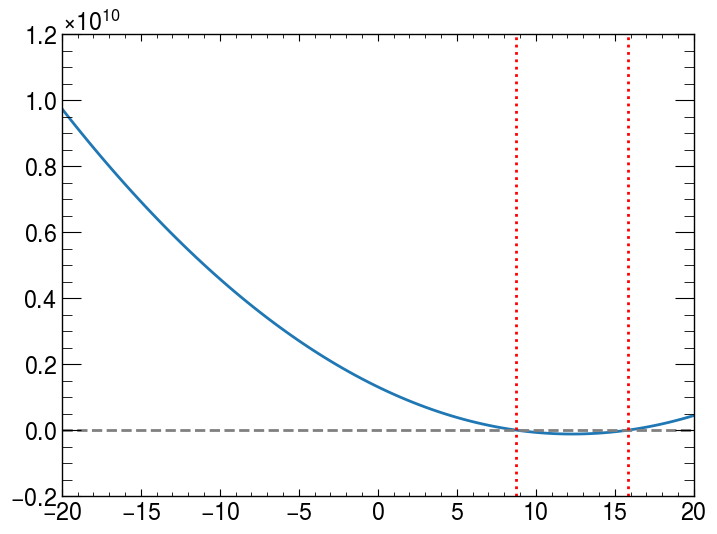

In [75]:
print(solve_quad(L2,L1,L0,100))
print(VL.Py())

In [135]:
%%time
evt_id = 2544839
evt_id = np.random.choice(len(Higgs['E']))
print(evt_id)
MET_X = MET.at[evt_id,'px'] - LeadingNu.at[evt_id,'px']
MET_Y = MET.at[evt_id,'py'] - LeadingNu.at[evt_id,'py']
WL  = np.array([  SubleadW.at[evt_id,'E'],  SubleadW.at[evt_id,'px'],  SubleadW.at[evt_id,'py'],  SubleadW.at[evt_id,'pz']])
LL  = np.array([SubleadLep.at[evt_id,'E'],SubleadLep.at[evt_id,'px'],SubleadLep.at[evt_id,'py'],SubleadLep.at[evt_id,'pz']])
VL  = np.array([ SubleadNu.at[evt_id,'E'], SubleadNu.at[evt_id,'px'], SubleadNu.at[evt_id,'py'], SubleadNu.at[evt_id,'pz']])
WH  = np.array([  LeadingW.at[evt_id,'E'],  LeadingW.at[evt_id,'px'],  LeadingW.at[evt_id,'py'],  LeadingW.at[evt_id,'pz']])
WH_M2 = WH[0]**2 - WH[1]**2 - WH[2]**2 - WH[3]**2
WH_dot_LL = WH[0]*LL[0] - WH[1]*LL[1] - WH[2]*LL[2] - WH[3]*LL[3]
MH = 125
MH_truth  =      Higgs.at[evt_id,  'm']
MW_truth  =   SubleadW.at[evt_id,  'm']
eta_truth =  SubleadNu.at[evt_id,'eta']
ML  = SubleadLep.at[evt_id,  'm']
N_div = 1000
nu_eta_bin = np.linspace(-3,3,N_div)
W_sublead_m_bin = np.linspace(0,80,N_div)
grid_x, grid_y = np.meshgrid(W_sublead_m_bin,nu_eta_bin)
weight = np.zeros((N_div,N_div))
max_weight = -99999
max_eta    = -99999
max_mw2    = -99999
tolerance  = 10000 
for i,eta in enumerate(nu_eta_bin):
    for j,MW in enumerate(W_sublead_m_bin):
        weight[i,j] = 0
        # calculating parameters
        cosh_eta = np.cosh(eta)
        sinh_eta = np.sinh(eta)
        A = 0.5*(MW**2 - ML**2) 
        B = LL[0]*cosh_eta - LL[3]*sinh_eta
        C = 0.5*(MH**2 - WH_M2 - MW**2) - WH_dot_LL
        D = WH[0]*cosh_eta - WH[3]*sinh_eta
        YDB = LL[2]*D - WH[2]*B
        XDB = LL[1]*D - WH[1]*B
        F = (     A*WH[1] -     C*LL[1] )/XDB
        G = ( LL[2]*WH[1] - WH[2]*LL[1] )/XDB
        L0 = ( (A*D-C*B)**2 - ( XDB*F)**2 ) 
        L1 = ( 2*(A*D-C*B)*YDB - 2*F*G*(XDB**2) )
        L2 = ( YDB**2 +  (1 - G**2)*( XDB**2))
        # solving quadratic equation
        det = L1*L1 - 4*L0*L2
        L0_prime = L0 - (tolerance*np.abs(L2)/L2)
        det_prime = L1*L1 - 4*L0_prime*L2
        if det >= 0 : 
            Y1 = (-1*L1 + np.sqrt(det))/(2*L2) 
            Y2 = (-1*L1 - np.sqrt(det))/(2*L2) 
            X1 = ((A*D-C*B) + YDB*Y1)/(-1*XDB)
            X2 = ((A*D-C*B) + YDB*Y2)/(-1*XDB)
            weight[i,j] = max( weight_eq( X1,MET_X , Y1,MET_Y ) , weight_eq( X2,MET_X ,Y2,MET_Y ) )
        elif  det_prime >= 0 :
            Y1 = (-1*L1 + np.sqrt(det_prime))/(2*L2) 
            Y2 = (-1*L1 + np.sqrt(det_prime))/(2*L2) 
            X1 = ((A*D-C*B) + YDB*Y1)/(-1*XDB)
            X2 = ((A*D-C*B) + YDB*Y2)/(-1*XDB)
            weight[i,j] = max( weight_eq( X1,MET_X , Y1,MET_Y ) , weight_eq( X2,MET_X , Y2,MET_Y ) )
        elif det_prime < 0 :
            weight[i,j] = -1
        if weight[i,j] > max_weight:
            max_weight = weight[i,j]
            max_eta = eta
            max_mw2 = MW
            


880244
CPU times: user 6.45 s, sys: 0 ns, total: 6.45 s
Wall time: 6.45 s


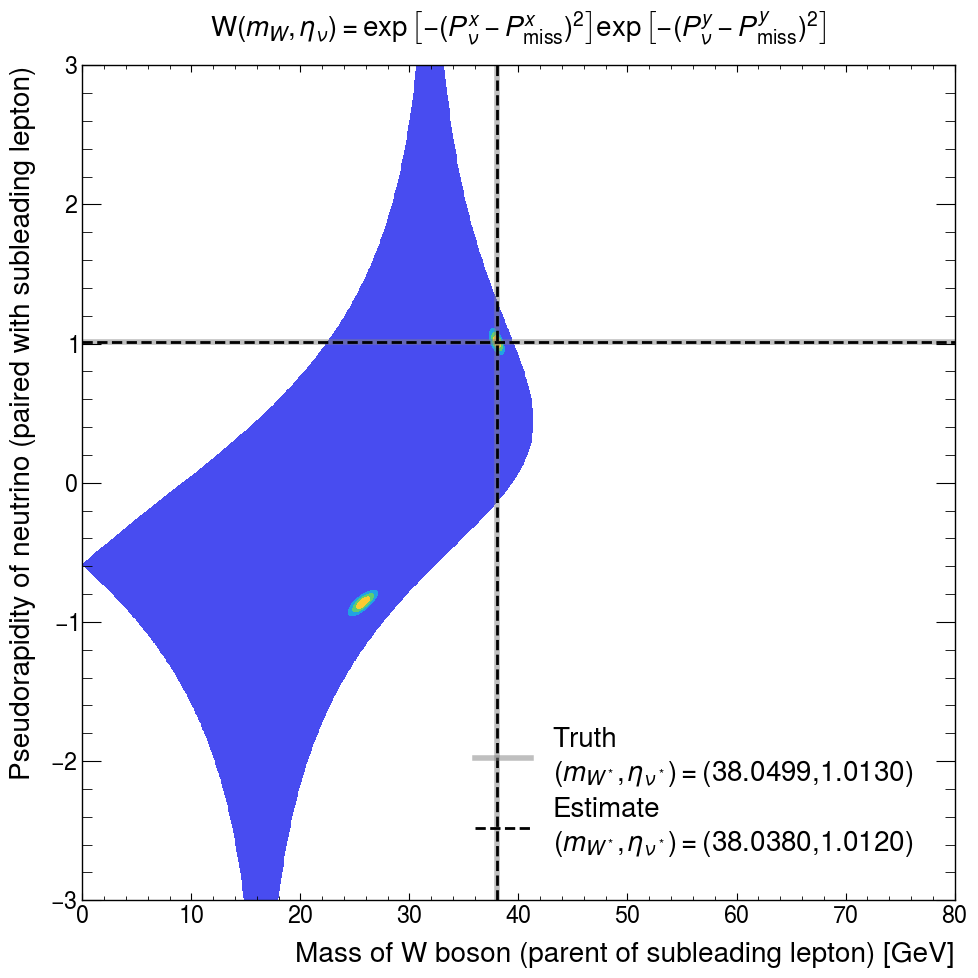

In [136]:
plt.style.use(hep.style.ATLAS)
fig, ax = plt.subplots(figsize=(10,10),tight_layout=True)
ax.set_title(r'$\mathcal{W}(m_{W},\eta_{\nu}) = \exp\left[-({P}^x_{\nu} - P^x_\mathrm{miss})^2\right]\exp\left[-({P}^y_{\nu} - P^y_\mathrm{miss})^2\right]$',pad=20,fontsize=20)
#hep.atlas.label(ax=ax,loc=1,fontsize=20)
#hep.atlas.label(ax=ax,loc = 4, rlabel=f'Event #{evt_id}',fontsize=20)

ax.set_xlabel("Mass of W boson (parent of subleading lepton) [GeV]")
ax.set_ylabel("Pseudorapidity of neutrino (paired with subleading lepton)")
#my_cmap = my_cmaps.kViridis()
my_cmap = mpl.cm.get_cmap("viridis").copy()
my_cmap.set_under('lightgray')
ax.contourf(grid_x, grid_y, weight,vmin=0,cmap=my_cmaps.parula('white'))
#ax.contourf(grid_x, grid_y, weight, vmin=0,cmap=my_cmap)

ax.axhline(eta_truth, alpha=0.5, c='grey', lw=4 )
ax.axvline(MW_truth , alpha=0.5, c='grey', lw=4, \
           label='Truth\n'+r'$(m_{W^*},\eta_{\nu^*})=$(%.4f,%.4f)'%(MW_truth,eta_truth))

ax.axhline(max_eta, ls='dashed', c='k', lw=2)
ax.axvline(max_mw2, ls='dashed', c='k', lw=2,\
           label='Estimate\n'+r'$(m_{W^*},\eta_{\nu^*})=$(%.4f,%.4f)'%(max_mw2,max_eta))

ax.legend(loc = 4, prop={'size':20})
plt.show()

In [ ]:
%%time

sigma_x = np.std(SubleadNu['px'])
sigma_y = np.std(SubleadNu['py'])
evtid = np.random.choice(len(Higgs['E']))
#evtid=497323
N_div = 1000
mH = 125
nu_eta_bin = np.linspace(-3,3,N_div)
W_sublead_m_bin = np.linspace(0,80,N_div)
grid_x, grid_y = np.meshgrid(W_sublead_m_bin,nu_eta_bin)
weight = np.zeros((N_div,N_div))
max_weight = -99999
max_eta = -99999
max_mw2 = -99999
for i,nu_eta in enumerate(nu_eta_bin):
    for j,W_sublead_m in enumerate(W_sublead_m_bin):
        weight[i,j] = 0
        
        El_prime = SubleadLep.at[evtid,'E']*np.cosh(nu_eta) - SubleadLep.at[evtid,'pz']*np.sinh(nu_eta)
        Eb_prime = LeadingW.at[evtid,'E']*np.cosh(nu_eta) - LeadingW.at[evtid,'pz']*np.sinh(nu_eta)
        # check 
        A = (SubleadLep.at[evtid,'py']*Eb_prime - LeadingW.at[evtid,'py']*El_prime)/(-1*SubleadLep.at[evtid,'px']*Eb_prime + LeadingW.at[evtid,'px']*El_prime)
        # check 
        par1 = (SubleadLep.at[evtid,'px'] * A + SubleadLep.at[evtid,'py'])/El_prime
        # check 
        C = A*A+1 - par1*par1
        # check 
        lep_dot_w = LeadingW.at[evtid,'E' ]*SubleadLep.at[evtid,'E' ] - \
                    LeadingW.at[evtid,'px']*SubleadLep.at[evtid,'px'] - \
                    LeadingW.at[evtid,'py']*SubleadLep.at[evtid,'py'] - \
                    LeadingW.at[evtid,'pz']*SubleadLep.at[evtid,'pz']
        B = (El_prime * (mH*mH - W_sublead_m*W_sublead_m - LeadingW.at[evtid,'m']**2 - 2*lep_dot_w) - Eb_prime*W_sublead_m*W_sublead_m)/(2*(SubleadLep.at[evtid,'px']*Eb_prime - LeadingW.at[evtid,'px']*El_prime))
        # check 
        par2 = (W_sublead_m*W_sublead_m*0.5 + B*SubleadLep.at[evtid,'px'])/El_prime
        # check 
        D = 2*(A*B - par2*par1)
        # check 
        F = B*B - par2*par2
        # check 
        det = D*D - 4*C*F
        # check 
        if det < 0:
            weight[i,j] = -1
        elif det == 0:
            py1 = -D/(2*C)
            px1 = A*py1 + B
            dy1 = (py1 - MET.at[evtid,'py'] + LeadingNu.at[evtid,'py'])#/(MET.at[evtid,'py'] - LeadingNu.at[evtid,'py'])
            dx1 = (px1 - MET.at[evtid,'px'] + LeadingNu.at[evtid,'px'])#/(MET.at[evtid,'px'] - LeadingNu.at[evtid,'px'])
            weight[i,j] = np.exp(-1*dy1*dy1)*np.exp(-1*dx1*dx1)
            #pT2_1 = px1*px1 + py1*py1
            #pz1 = np.sqrt(PT2_1)*np.sinh(nu_eta)
        elif det>0:
            py1 = (-D + np.sqrt(det))/(2*C)
            py2 = (-D - np.sqrt(det))/(2*C)
            px1 = A*py1 + B
            px2 = A*py2 + B
            dy1 = (py1 - MET.at[evtid,'py'] + LeadingNu.at[evtid,'py'])#/(MET.at[evtid,'py'] - LeadingNu.at[evtid,'py'])
            dx1 = (px1 - MET.at[evtid,'px'] + LeadingNu.at[evtid,'px'])#/(MET.at[evtid,'px'] - LeadingNu.at[evtid,'px'])
            dy2 = (py2 - MET.at[evtid,'py'] + LeadingNu.at[evtid,'py'])#/(MET.at[evtid,'py'] - LeadingNu.at[evtid,'py'])
            dx2 = (px2 - MET.at[evtid,'px'] + LeadingNu.at[evtid,'px'])#/(MET.at[evtid,'px'] - LeadingNu.at[evtid,'px'])
            weight1 = np.exp(-1*dy1*dy1)*np.exp(-1*dx1*dx1)
            weight2 = np.exp(-1*dy2*dy2)*np.exp(-1*dx2*dx2)
            weight[i,j] = max(weight1,weight2)
        if weight[i,j] > max_weight:
            max_weight = weight[i,j]
            max_eta = nu_eta
            max_mw = W_sublead_m
            
plt.style.use(hep.style.ATLAS)
fig, ax = plt.subplots(figsize=(10,10),tight_layout=True)
ax.set_title(r'$\mathcal{W}(m_{W},\eta_{\nu}) = \exp\left[-({P}^x_{\nu} - P^x_\mathrm{miss})^2\right]\exp\left[-({P}^y_{\nu} - P^y_\mathrm{miss})^2\right]$',pad=20,fontsize=20)
#hep.atlas.label(ax=ax,loc=1,fontsize=20)
hep.atlas.label(ax=ax,loc = 4, rlabel=f'Event #{evtid}',fontsize=20)
ax.set_xlabel("Mass of W boson (parent of subleading lepton) [GeV]")
ax.set_ylabel("Pseudorapidity of neutrino (paired with subleading lepton)")
#my_cmap = my_cmaps.kViridis()
my_cmap = my_cmaps.parula()
my_cmap.set_under('w')
ax.contourf(grid_x, grid_y, weight, vmin=0,cmap=my_cmap)
ax.axvline(SubleadW.at[evtid,'m'], alpha=0.5, c='grey', lw=4, label='Truth\n'+r'$(m_{W^*},\eta_{\nu^*})=$(%.4f,%.4f)'%(SubleadW.at[evtid,'m'],SubleadNu.at[evtid,'eta']))
ax.axhline(SubleadNu.at[evtid, 'eta'],alpha=0.5, c='grey', lw=4 )
ax.axvline(max_mw, ls='dashed', c='k', lw=2, label='Estimate\n'+r'$(m_{W^*},\eta_{\nu^*})=$(%.4f,%.4f)'%(max_mw,max_eta))
ax.axhline(max_eta, ls='dashed', c='k', lw=2)
ax.legend(loc = 6, prop={'size':20})
plt.show()